<a href="https://colab.research.google.com/github/rajeev-gautam/Project_Titanic-Classication_Comparison/blob/main/Project_Titanic_Classification_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Titanic**
# **Classification**

In [4]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as  sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(12, 10)})

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [7]:
data = pd.read_csv('titanic_data.csv')

## Loading the Dataset

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.shape

(891, 12)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## <font color='yellow'>Analysing Numerical Values</font>

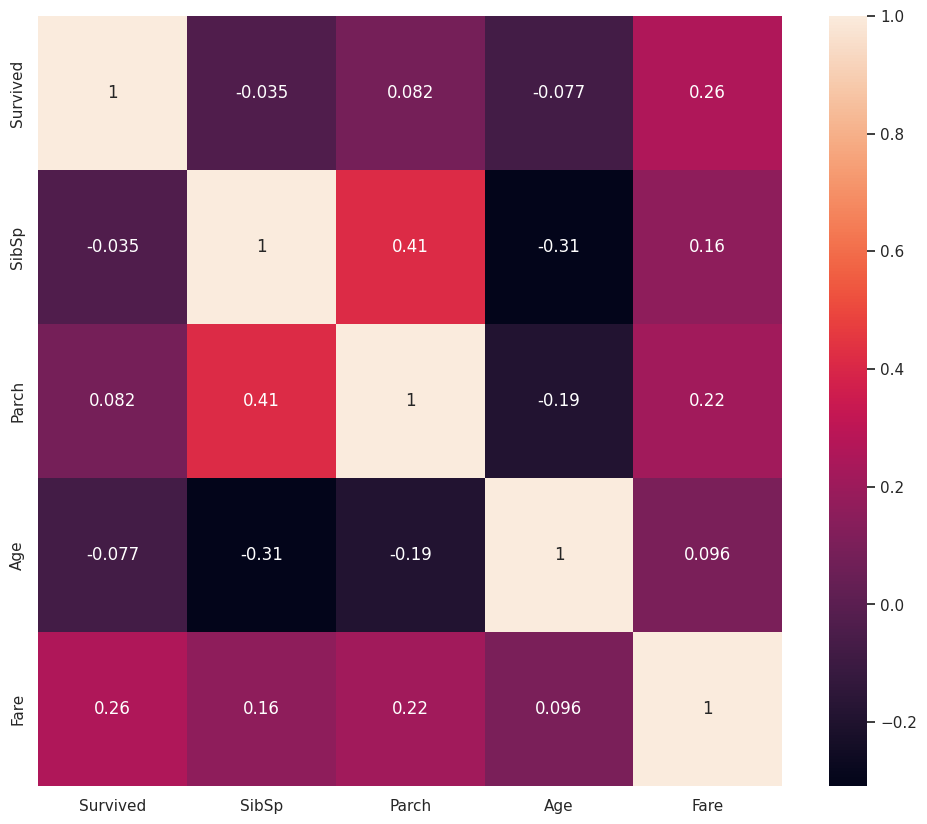

In [13]:
plt.figure(figsize=(12,10))
heatmap = sns.heatmap(data[["Survived", "SibSp","Parch","Age","Fare"]].corr(), annot=True)

### **Conclusion:**
Only Fare Feature seems to have a significance correlation with the Survival Probability.

To determine whether the other features are useful to us or not, let's explore in detail these features

## <font color='yellow'>Analysing SibSp - Number of siblings / spouses</font>

In [14]:
data['SibSp'].nunique()

7

In [15]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

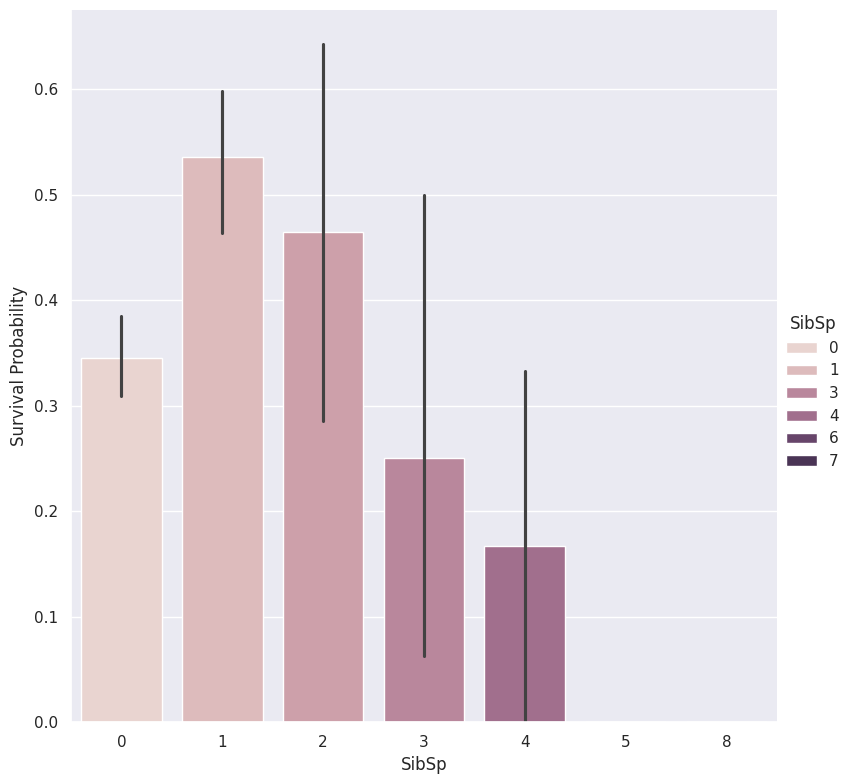

In [20]:
bar_sibsp = sns.catplot(x = 'SibSp', y = 'Survived',hue='SibSp', data = data, kind = "bar", height = 8)
bar_sibsp = bar_sibsp.set_ylabels("Survival Probability")

It seems that passengers having a lot of siblings/spouses have less chance to survive.
Single passengers (0 SibSP) or with two other persons (SibSP 1 or 2) have more chance to survive.

## <font color='yellow'>Analysing Age column</font>

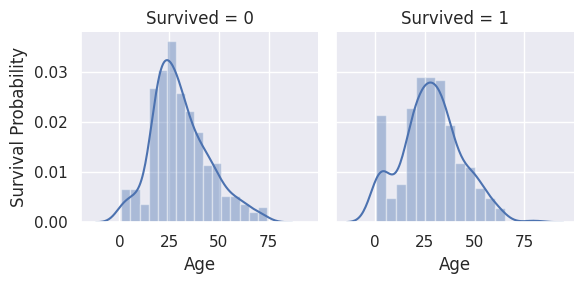

In [23]:
age_g = sns.FacetGrid(data, col = 'Survived')
age_g = age_g.map(sns.distplot, 'Age')
age_g = age_g.set_ylabels("Survival Probability")

Age distribution seems to be a tailed distribution, maybe a gaussian distribution.

We notice that age distributions are not the same in the survived and not survived subpopulations. Indeed, there is a peak corresponding to young passengers, that have survived. We also see that passengers between 60-80 have less survived.

So, even if "Age" is not correlated with "Survived", we can see that there is age categories of passengers that of have more or less chance to survive.

It seems that very young passengers have more chance to survive.

## <font color='yellow'>Analysing Sex column</font>

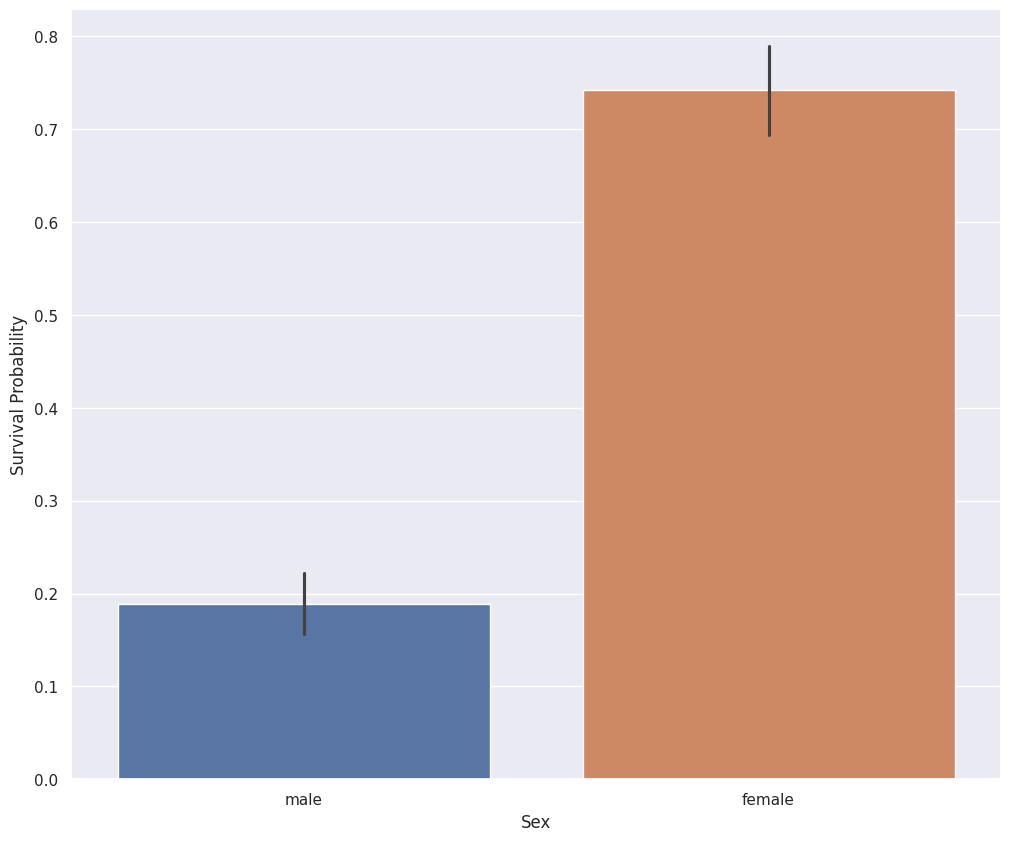

In [26]:
plt.figure(figsize=(12,10))
gender_plot = sns.barplot(x = 'Sex', y = 'Survived', hue = 'Sex', data = data)
gender_plot = gender_plot.set_ylabel("Survival Probability")

In [27]:
data[["Sex", "Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


It is clearly obvious that Male have less chance to survive than Female. So Sex, might play an important role in the prediction of the survival.

## <font color='yellow'>Analysing PClass column</font>

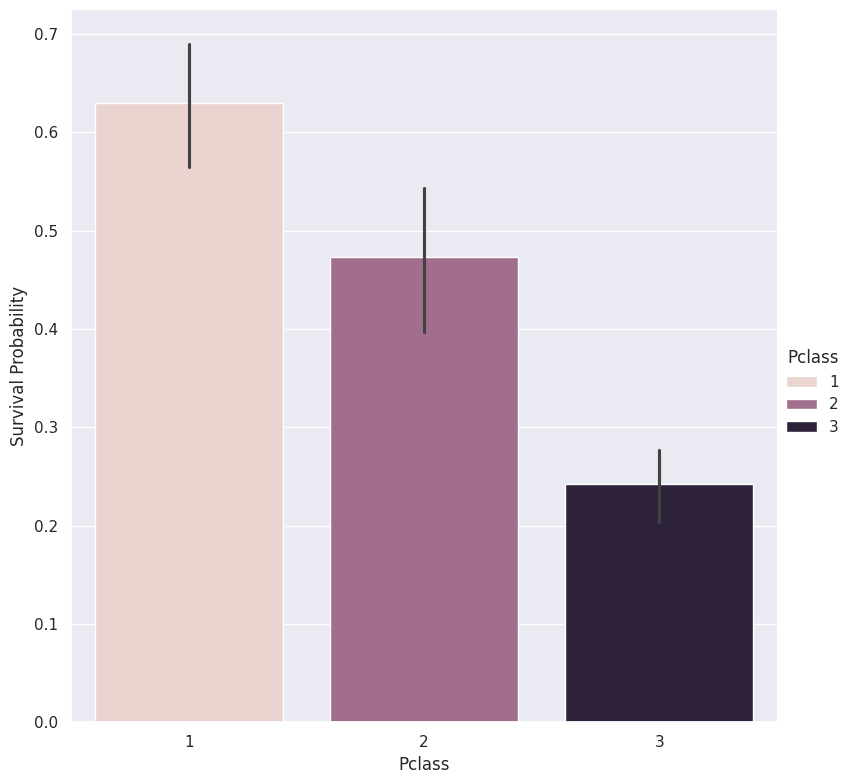

In [30]:
pclass = sns.catplot(x = "Pclass", y = "Survived", hue = "Pclass", data = data, kind = "bar", height = 8)
pclass = pclass.set_ylabels("Survival Probability")

## <font color='yellow'>Analysing Pclass Vs Survived by Sex</font>

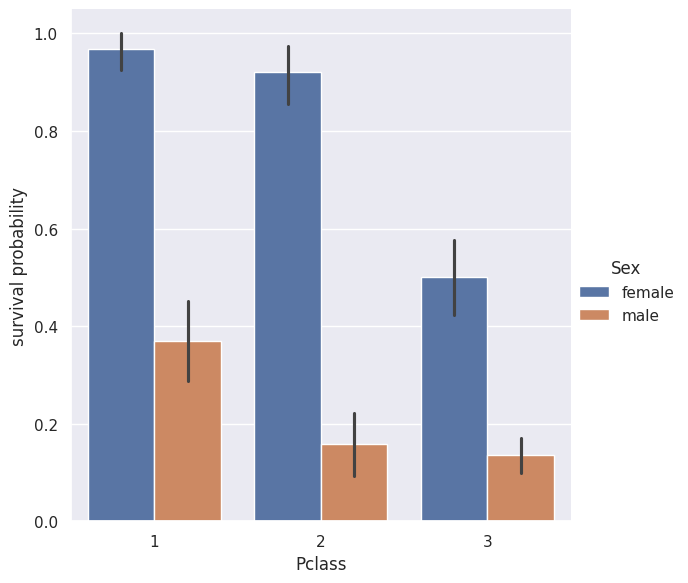

In [32]:
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=data, height=6, kind="bar")
g = g.set_ylabels("survival probability")

## <font color='yellow'>Analysing Embarked column</font>

In [33]:
data["Embarked"].isnull().sum()

np.int64(2)

In [34]:
data["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [35]:
#Fill Embarked with 'S' i.e. the most frequent values
data["Embarked"] = data["Embarked"].fillna("S")

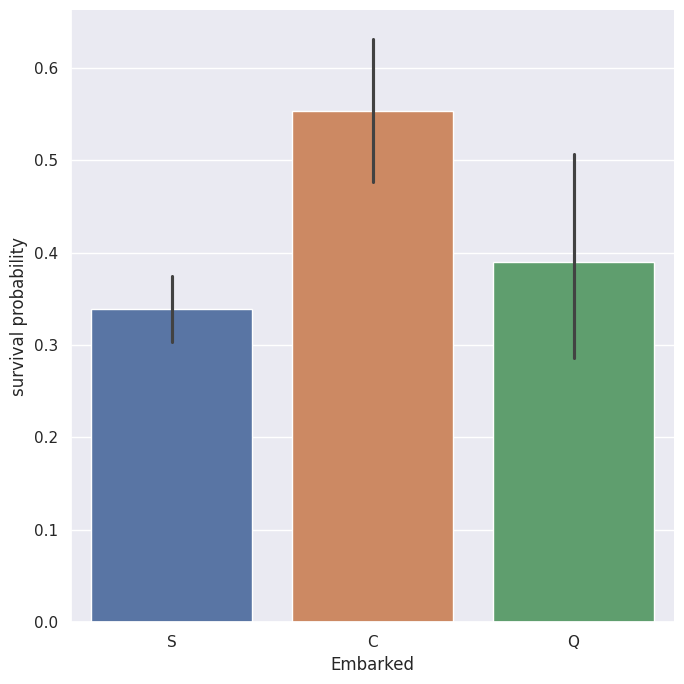

In [37]:
g = sns.catplot(x="Embarked", y="Survived", hue="Embarked", data=data, height=7, kind="bar")
g = g.set_ylabels("survival probability")

Passenger coming from Cherbourg (C) have more chance to survive.

## <font color='yellow'>Pclass vs Embarked </font>

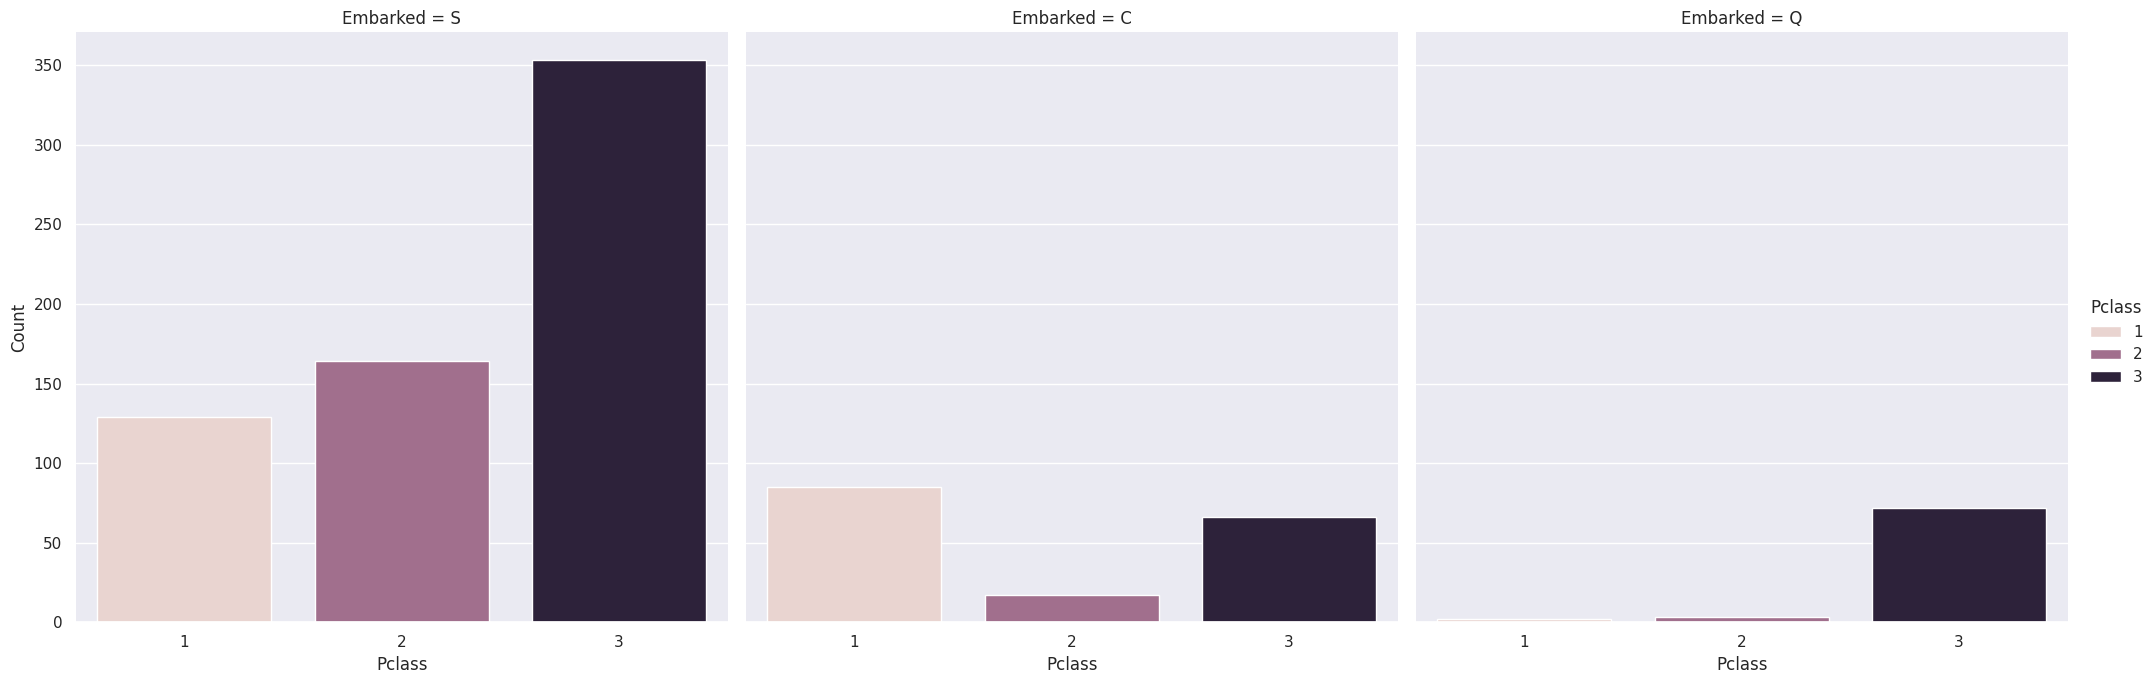

In [49]:
g = sns.catplot(x="Pclass", col="Embarked", hue='Pclass',  data = data , height=7, kind="count")
g.despine(left=True)
g = g.set_ylabels("Count")

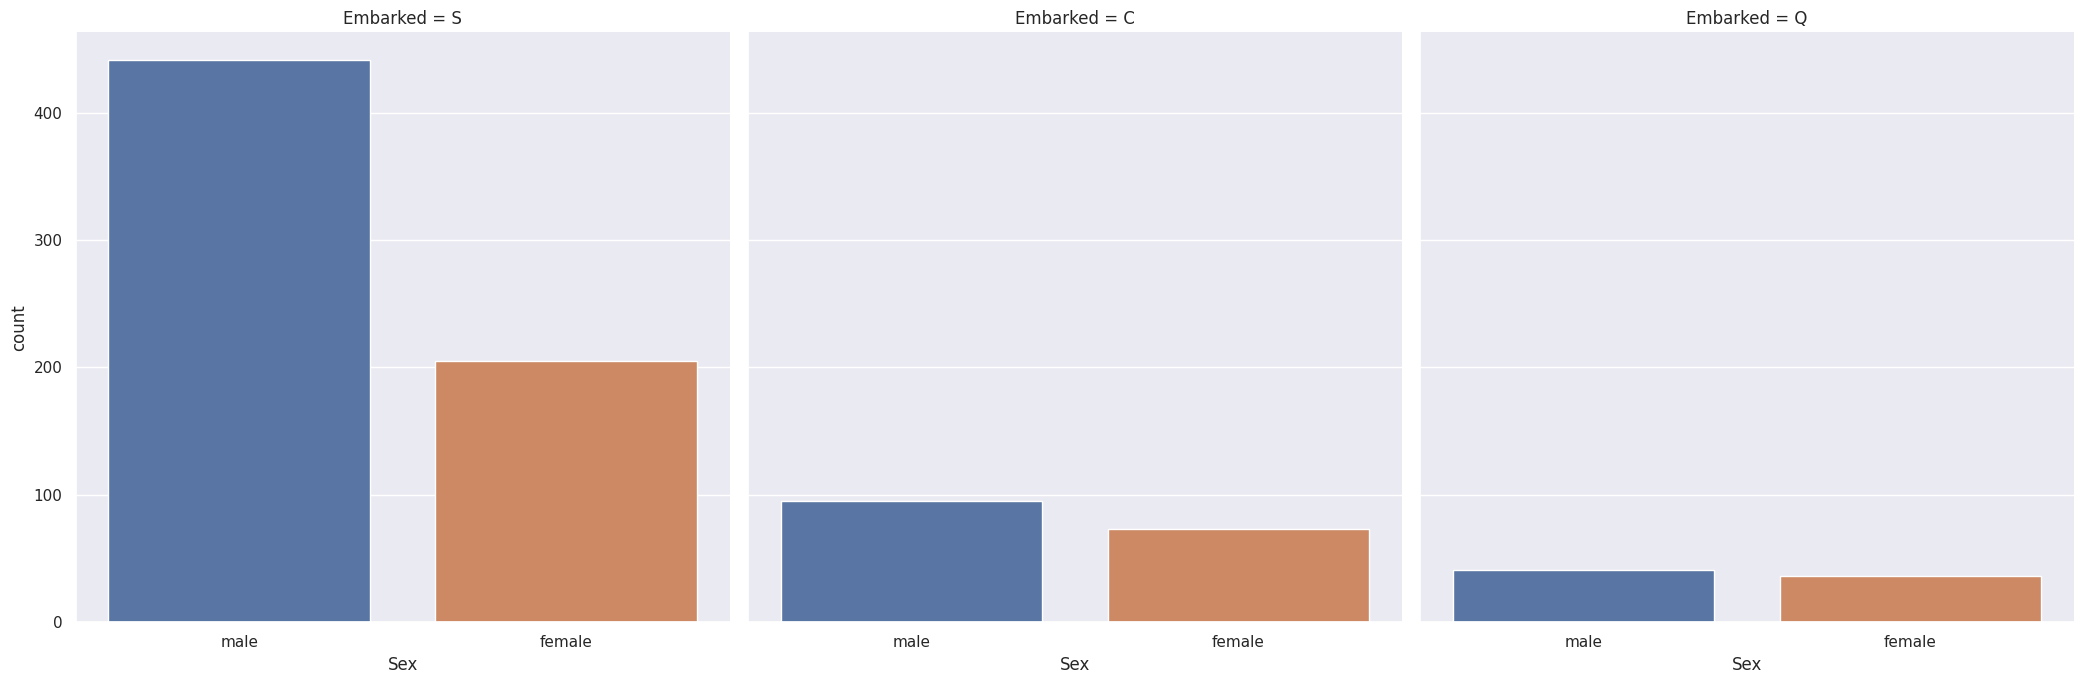

In [51]:
#Exploring Sex Vs Embarked
g = sns.catplot(x="Sex", col="Embarked", hue="Sex",  data=data, height=7, kind="count")

Cherbourg passengers are mostly in first class which have the highest survival rate.

Southampton (S) and Queenstown (Q) passangers are mostly in third class.

# <font color='Yellow'>Preparing Data</font>

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
mean = data["Age"].mean()
std = data["Age"].std()
is_null = data["Age"].isnull().sum()

# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)

# fill NaN values in Age column with random values generated
age_slice = data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
data["Age"] = age_slice

In [54]:
data['Age'].isnull().sum()

np.int64(0)

In [56]:
#Filling Embarked with 'S' i.e. the most frequent values
data["Embarked"] = data["Embarked"].fillna("S")

In [57]:
data['Embarked'].isnull().sum()

np.int64(0)

In [58]:
col_to_drop = ['PassengerId','Cabin', 'Ticket','Name']
data.drop(col_to_drop, axis=1, inplace = True)

In [59]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [60]:
genders = {"male": 0, "female": 1}
data['Sex'] = data['Sex'].map(genders)

In [63]:
ports = {"S": 0, "C": 1, "Q": 2}
data['Embarked'] = data['Embarked'].map(ports)

In [64]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


## <font color='yellow'>Splitting the Data</font>

In [66]:
# input and output data

x = data.drop(data.columns[[0]], axis = 1)
y = data['Survived']

In [67]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [68]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [69]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state =0)

## <font color='yellow'>Feature Scaling</font>

In [70]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

## <font color='yellow'>Classification</font>

In [71]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 0 )

In [72]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [73]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [74]:
# finding accuracy
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)

In [75]:
print ("Logistic Regression : ", round(logreg_acc*100, 2))
print ("Support Vector      : ", round(svc_classifier_acc*100, 2))
print ("Decision Tree       : ", round(dt_classifier_acc*100, 2))
print ("K-NN Classifier     : ", round(knn_classifier_acc*100, 2))
print ("Random Forest       : ", round(rf_classifier_acc*100, 2))

Logistic Regression :  80.97
Support Vector      :  81.72
Decision Tree       :  78.73
K-NN Classifier     :  81.34
Random Forest       :  81.72
